In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models, Model
import numpy as np


# fancy graphics
plt.style.use('seaborn')
plt.tight_layout()

<Figure size 576x396 with 0 Axes>

## Plotting methods of training and validation loss

In [2]:
def plotLoss(losses, loss_fn, ep_first_phase=None):
    #Plotting the validation and training errors
    x_axis = range(1,len(losses['loss'])+1)

    if ep_first_phase is not None:
        plt.axvline(ep_first_phase, c='teal', linestyle='--', label='End of first training phase')
    plt.plot(x_axis, losses['loss'], label='Training loss', c='orange')
    plt.plot(x_axis, losses['val_loss'], label='Validation loss', linestyle='-.', c='brown', linewidth=2)

    plt.xlabel('Epochs')
    plt.ylabel(loss_fn)
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [3]:
def plotAll(saves):
    convNums, batchSizes, epochs, train_l, val_l = [],[],[],[],[]
    for save in saves:
        convNums.append(save['cnv'])
        batchSizes.append(save['btchSz'])
        epochs.append(save['ep'])
        train_l.append(save['tr_l'])
        val_l.append(save['val_l'])

    # make two 3d heatmaps, one for training loss and one for validation loss
    fig = plt.figure(figsize=(16,8))
    for i,loss in enumerate((train_l,val_l)):
        ax = fig.add_subplot(121+i, projection='3d')

        colmap = cm.ScalarMappable(cmap=cm.YlOrRd)
        colmap.set_array(train_l)

        ax.scatter(convNums,batchSizes,epochs,marker='s',s=140,c=loss,cmap='YlOrRd')
        fig.colorbar(colmap)
        ax.set_xlabel('Convolution layers')
        ax.set_ylabel('Batch Size')
        ax.set_zlabel('Epochs')
        ax.grid(True)
        ax.set_title('Training Loss') if i == 0 else ax.set_title('Validation Loss')

    plt.show()

### Paths

In [4]:
models_dir = 'autoencoder_models/'

# files with models
best_model_fname = 'best.h5'
bigBatch_model_fname = 'big_batch.h5'
complex_model_fname = 'complex.h5'

# files with losses
best_model_loss_fname = 'best_loss.npy'
bigBatch_model_loss_fname = 'big_batch_loss.npy'
complex_model_loss_fname = 'complex_loss.npy'

## We have researched 3 autoencoder models, namely:
### - A model that we think is the best because it achieves an optimal loss minimization and it is time efficient compared to models that are deeper layer-wise and more complex

### - A model that has the same architecture with our best model but uses a bigger batch size during training. We use this model to show that its better to do more gradient updates in one epoch, something you achieve with small batches

### - A model that uses a lot of convolution and normalization layers, i.e. is deeper. We use this model to show that there is no gain in loss minimization, moreover this model takes double the time for each epoch compared to our best model

### Below we provide an overview of the model architectures and training iterations for all 3 models

### Best model

In [5]:
model = models.load_model(models_dir + best_model_fname, compile= False)

In [6]:
model.summary()

Model: "N1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640     

In [7]:
dummy=\
"""
Best Model

Params:
    Epochs: 30
    Batch Size: 64
    Conv Layers: 5

Training:    
Epoch 1/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0168 - val_loss: 0.0090
Epoch 2/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 3/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 4/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0012 - val_loss: 5.5491e-04
Epoch 6/30
750/750 [==============================] - 7s 9ms/step - loss: 8.2964e-04 - val_loss: 4.1838e-04
Epoch 7/30
750/750 [==============================] - 7s 9ms/step - loss: 6.1813e-04 - val_loss: 3.5893e-04
Epoch 8/30
750/750 [==============================] - 7s 9ms/step - loss: 4.5622e-04 - val_loss: 2.6886e-04
Epoch 9/30
750/750 [==============================] - 7s 10ms/step - loss: 3.7254e-04 - val_loss: 3.2046e-04
Epoch 10/30
750/750 [==============================] - 7s 9ms/step - loss: 3.1901e-04 - val_loss: 1.7976e-04
Epoch 11/30
750/750 [==============================] - 7s 9ms/step - loss: 2.5227e-04 - val_loss: 1.9831e-04
Epoch 12/30
750/750 [==============================] - 7s 9ms/step - loss: 2.2156e-04 - val_loss: 1.6834e-04
Epoch 13/30
750/750 [==============================] - 7s 9ms/step - loss: 1.8580e-04 - val_loss: 1.6123e-04
Epoch 14/30
750/750 [==============================] - 7s 9ms/step - loss: 1.5326e-04 - val_loss: 2.0957e-04
Epoch 15/30
750/750 [==============================] - 7s 9ms/step - loss: 1.5011e-04 - val_loss: 1.4149e-04
Epoch 16/30
750/750 [==============================] - 7s 9ms/step - loss: 1.2689e-04 - val_loss: 1.5338e-04
Epoch 17/30
750/750 [==============================] - 7s 9ms/step - loss: 1.1692e-04 - val_loss: 1.1249e-04
Epoch 18/30
750/750 [==============================] - 7s 9ms/step - loss: 1.0013e-04 - val_loss: 1.2627e-04
Epoch 19/30
750/750 [==============================] - 7s 9ms/step - loss: 8.9561e-05 - val_loss: 1.1079e-04
Epoch 20/30
750/750 [==============================] - 7s 9ms/step - loss: 8.6835e-05 - val_loss: 1.3633e-04
Epoch 21/30
750/750 [==============================] - 7s 9ms/step - loss: 7.6951e-05 - val_loss: 7.6563e-05
Epoch 22/30
750/750 [==============================] - 7s 10ms/step - loss: 7.3907e-05 - val_loss: 3.0552e-04
Epoch 23/30
750/750 [==============================] - 7s 9ms/step - loss: 6.8879e-05 - val_loss: 8.0245e-05
Epoch 24/30
750/750 [==============================] - 7s 9ms/step - loss: 6.3263e-05 - val_loss: 8.9976e-05
Epoch 25/30
750/750 [==============================] - 7s 9ms/step - loss: 5.9281e-05 - val_loss: 8.9869e-05
Epoch 26/30
750/750 [==============================] - 7s 9ms/step - loss: 5.5041e-05 - val_loss: 1.0131e-04
Epoch 27/30
750/750 [==============================] - 7s 9ms/step - loss: 5.1039e-05 - val_loss: 1.2277e-04
Epoch 28/30
750/750 [==============================] - 7s 9ms/step - loss: 4.9345e-05 - val_loss: 1.1173e-04
Epoch 29/30
750/750 [==============================] - 7s 9ms/step - loss: 4.7121e-05 - val_loss: 7.8310e-05
Epoch 30/30
750/750 [==============================] - 7s 9ms/step - loss: 4.4984e-05 - val_loss: 8.0537e-05
"""

### Bigger Batch Size model

#### This model has the same architecture with the best model

### Below we can see that the rate of loss minimization drops significantly when using bigger batches

In [8]:
dummy=\
"""
Bigger batch size Model

Params:
    Epochs: 30
    Batch Size: 512
    Conv Layers: 5
    
Training:    
Epoch 1/30
94/94 [==============================] - 5s 50ms/step - loss: 0.0483 - val_loss: 0.1790
Epoch 2/30
94/94 [==============================] - 4s 44ms/step - loss: 0.0181 - val_loss: 0.1692
Epoch 3/30
94/94 [==============================] - 4s 44ms/step - loss: 0.0130 - val_loss: 0.0314
Epoch 4/30
94/94 [==============================] - 4s 44ms/step - loss: 0.0106 - val_loss: 0.0186
Epoch 5/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0090 - val_loss: 0.0132
Epoch 6/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0077 - val_loss: 0.0145
Epoch 7/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0069 - val_loss: 0.0116
Epoch 8/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0061 - val_loss: 0.0038
Epoch 9/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0053 - val_loss: 0.0138
Epoch 10/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0050 - val_loss: 0.0079
Epoch 11/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0042 - val_loss: 0.0058
Epoch 12/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 13/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 14/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0035 - val_loss: 0.0070
Epoch 15/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0032 - val_loss: 0.0074
Epoch 16/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 17/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 18/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 19/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 20/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 21/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 22/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0018 - val_loss: 0.0071
Epoch 23/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 24/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0019 - val_loss: 8.9657e-04
Epoch 25/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0016 - val_loss: 9.1332e-04
Epoch 26/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 27/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0015 - val_loss: 7.8089e-04
Epoch 28/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0014 - val_loss: 7.4974e-04
Epoch 29/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 30/30
94/94 [==============================] - 4s 45ms/step - loss: 0.0013 - val_loss: 0.0020
"""

### Complex model

In [9]:
model = models.load_model(models_dir + complex_model_fname, compile= False)

In [10]:
model.summary()

Model: "N1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
batch_normalization_26 (Batc (None, 28, 28, 8)         32        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 16)        1168     

### Below we can see that the more complex model has no advantage with comparison to our best model

In [11]:
dummy=\
"""
Complex model
Params:
    Epochs: 30
    Batch Size: 64
    Conv Layers: 10
Training:    
Epoch 1/30
750/750 [==============================] - 13s 18ms/step - loss: 0.0300 - val_loss: 0.0227
Epoch 2/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0114 - val_loss: 0.0091
Epoch 3/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 4/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 5/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 6/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0041 - val_loss: 0.0053
Epoch 7/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 8/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 9/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 10/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 11/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 12/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 13/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 14/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0015 - val_loss: 0.0066
Epoch 15/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 16/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 17/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 18/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0011 - val_loss: 9.3480e-04
Epoch 19/30
750/750 [==============================] - 13s 17ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 20/30
750/750 [==============================] - 13s 17ms/step - loss: 9.4572e-04 - val_loss: 0.0014
Epoch 21/30
750/750 [==============================] - 13s 17ms/step - loss: 8.8211e-04 - val_loss: 0.0019
Epoch 22/30
750/750 [==============================] - 13s 17ms/step - loss: 8.1801e-04 - val_loss: 7.8513e-04
Epoch 23/30
750/750 [==============================] - 13s 17ms/step - loss: 7.7000e-04 - val_loss: 7.4732e-04
Epoch 24/30
750/750 [==============================] - 13s 17ms/step - loss: 7.2659e-04 - val_loss: 7.4442e-04
Epoch 25/30
750/750 [==============================] - 13s 17ms/step - loss: 6.8788e-04 - val_loss: 8.6240e-04
Epoch 26/30
750/750 [==============================] - 13s 17ms/step - loss: 6.4305e-04 - val_loss: 0.0011
Epoch 27/30
750/750 [==============================] - 13s 17ms/step - loss: 6.3070e-04 - val_loss: 9.6152e-04
Epoch 28/30
750/750 [==============================] - 13s 17ms/step - loss: 5.7266e-04 - val_loss: 7.2832e-04
Epoch 29/30
750/750 [==============================] - 13s 17ms/step - loss: 5.5194e-04 - val_loss: 7.7867e-04
Epoch 30/30
750/750 [==============================] - 13s 17ms/step - loss: 5.3154e-04 - val_loss: 7.6593e-04
"""

### Below we load the models' training and validation losses during training

In [12]:
x = np.load(models_dir + best_model_loss_fname, allow_pickle=True)
best_losses = x.tolist()

x = np.load(models_dir + bigBatch_model_loss_fname, allow_pickle=True)
bBatch_losses = x.tolist()

x = np.load(models_dir + complex_model_loss_fname, allow_pickle=True)
complex_losses = x.tolist()

## Training and validation losses over epochs

### Best model

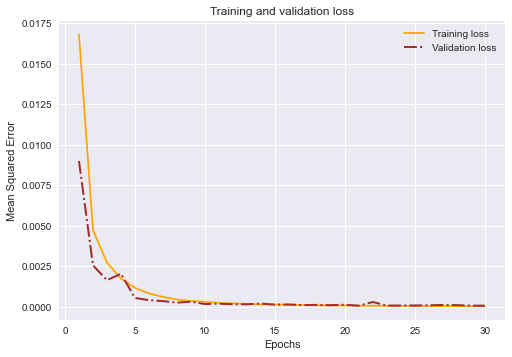

In [13]:
plotLoss(best_losses, 'Mean Squared Error')

### Bigger Batch Size model

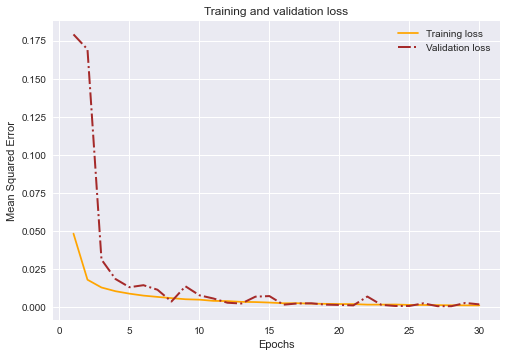

In [14]:
plotLoss(bBatch_losses, 'Mean Squared Error')

### Complex model

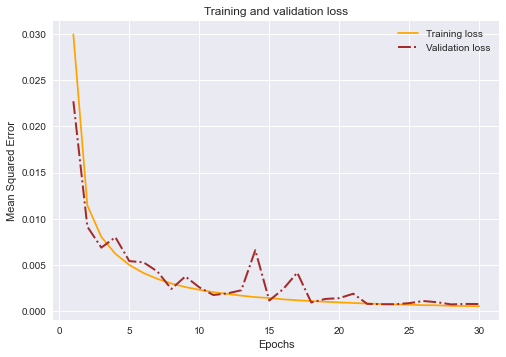

In [15]:
plotLoss(complex_losses, 'Mean Squared Error')

## From the above plots we can clearly see that there is no overfitting in all 3 models, something that occurs when the validation loss gets bigger while the training loss gets smaller

### Below we plot a 3d heatmap of the training and validation losses over the models' hyperparameters

In [16]:
def model_hparams_config(convolution_layers, batch_size, epochs, training_loss, val_loss):
    return {'cnv': convolution_layers,
            'btchSz': batch_size,
            'ep': epochs,
            'tr_l': training_loss,
            'val_l': val_loss}

In [17]:
best_config = model_hparams_config(5, 64, 50, best_losses['loss'][-1], best_losses['val_loss'][-1])

bBatch_config = model_hparams_config(5, 512, 50, bBatch_losses['loss'][-1], bBatch_losses['val_loss'][-1])

complex_config = model_hparams_config(10, 64, 50, complex_losses['loss'][-1], complex_losses['val_loss'][-1])

In [18]:
%matplotlib qt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

model_hyperparams=  [best_config, bBatch_config, complex_config]


plotAll(model_hyperparams)